## Time Series Analysis & Forecast Quiz

In this quiz, we’ll explore and build time series forecasting models for *Measurements of Electricity Prices*  of a District given the total amount of Electricity consumed in that District from 2010 to 2021.

## Data Set Information:

The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.
[Dataset](https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast)

## Notes:

1. The dataset is sampled on an hourly basis. It has the following features:

## Attribute Information:

*FullDate*: Date in format yyyy-mm-dd  hh:mm:ss

*ElecPrice*: Prices of electricity charged in Kw per hour

*Gas Price*: power generated was done via a gas power plant, gas price is the price of gas at time-T

*SysLoad*: Total Load on system or Power consumed at time-T 
Tmax: maximum temperature at time-T

In [260]:
# importing requried libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
# reading the dataset
df=pd.read_csv('/Time_series_analysis_and_forecast_DATASET.csv')

In [262]:
# an overview of the first 5 dataset
df.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [263]:
# checking the dimensions of the data frame
print("The Shape is: ", df.shape)

The Shape is:  (92016, 5)


There are 92016 rows and 5 columns

In [264]:
# a view of all the columns
df.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [265]:
# checking for the data types
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

The data types are in float except for the Full Date Column.

In [266]:
#check for missing values
df.isnull().values.any()

False

There are no missing values in our dataset

In [267]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [268]:
#convert column to datetime
df["FullDate"] = pd.to_datetime(df["FullDate"])
df.set_index("FullDate" , inplace= True )

In [269]:
df.head(3)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565


Q11.

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

## Answer

In [270]:
# resampling the data from an hour sampling rate to a daily sampling rate 
df_daily = df.resample('D').sum()

In [272]:
# an overview of the first 5 dataset
df_daily.head(5)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


Text(0, 0.5, 'Electric Price')

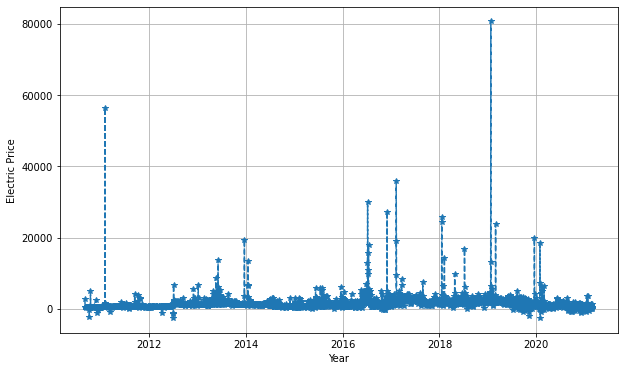

In [273]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily['ElecPrice'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electric Price' )

Q12.

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places? 

## Answer:

In [276]:
# importing requried libary
from statsmodels.tsa.stattools import adfuller

# Augmented Dicky Fuller test (ADF)
adf_result_SysLoad = adfuller(df_daily['SysLoad'])
adf_result_GasPrice = adfuller(df_daily['GasPrice'])

In [277]:
# P-value of the SysLoad and GasPrice of the resampled Data set in 6 decimal places
print(f'SysLoad p-value: {round(adf_result_SysLoad[1],6)}')
print(f'GasPrice p-value: {round(adf_result_GasPrice[1],6)}')

SysLoad p-value: 0.004254
GasPrice p-value: 0.045027


Q13.

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

## Answer

In [279]:
# Augmented Dicky Fuller test (ADF) for ElecPrice
adf_result_ElecPrice = adfuller(df_daily['ElecPrice'])

# 10% and 5% critical values of GasPrice and ElecPrice
print('Critical Values:')
print(f'10% of GasPrice : {round(adf_result_GasPrice[4]["10%"],4)}')
print(f'5% of ElecPrice : {round(adf_result_ElecPrice[4]["5%"],4)}')

Critical Values:
10% of GasPrice : -2.5672
5% of ElecPrice : -2.8623


In [280]:
# training and spliting the dataset
train_data = df_daily.iloc[:2757,:]
test_data = df_daily.iloc[2757:,:]

# shape of the training and testing dataset
train_data.shape , test_data.shape

((2757, 4), (1077, 4))

In [281]:
# reseting the index of the training dataset
train_data.reset_index(inplace = True)
train_data.head(3)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [282]:
train_df = train_data.iloc[:,[0,-1]]

# renaming the train dataset
train_df = train_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
train_df.head(3)

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975


In [283]:
# reseting the index of the test dataset
test_data.reset_index(inplace = True)
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [284]:
test_df = test_data.iloc[:,[0,-1]]

# renaming the test dataset
test_df = test_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_df.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [285]:
# importing libary
from fbprophet import Prophet

In [286]:
model = Prophet()
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [287]:
forecast_values = model.predict(test_df) 
forecast_values.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,157.675032,5038.491923,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,313.676802,5033.589688,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,309.524760,5244.708596,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,92.310687,5033.301689,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-178.094521,4693.561072,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


Q14.

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it. 

## Answer

In [288]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [289]:
MAPE = Metric(test_df['y'],forecast_values['yhat'])
print(f'The Mean Average Percentage Error is: {round(MAPE,2)}')

The Mean Average Percentage Error is: 549.48


Q15.

What is the RMSE in 2 decimal places?

## Answer

In [290]:
# importing libaries
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(test_df['y'],forecast_values['yhat']))
print(f'The Mean Average Percentage Error is: {round(RMSE,2)}')

The Mean Average Percentage Error is: 3218.16


Q16.

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

## Answer

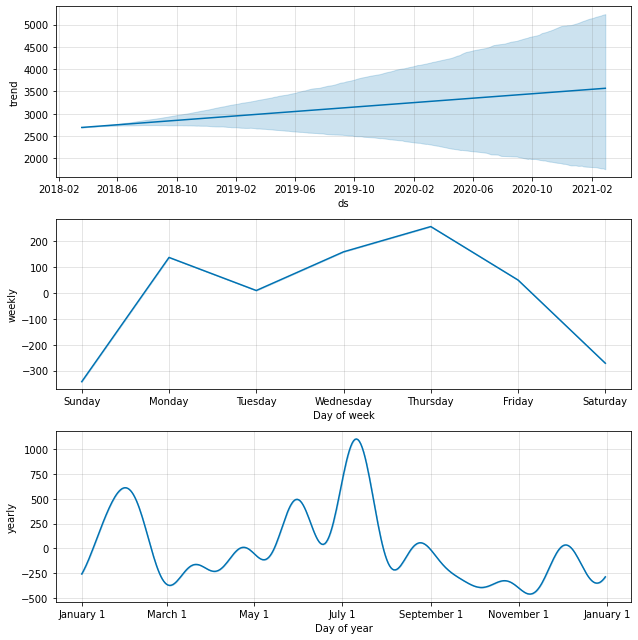

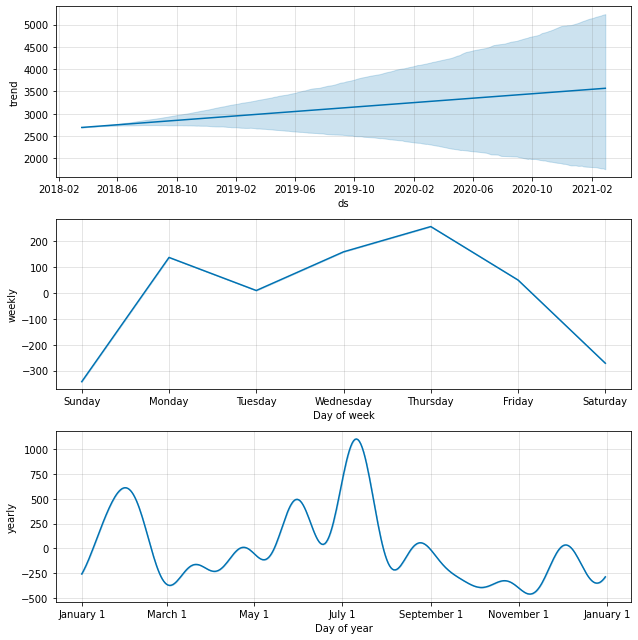

In [291]:
# plotting the components from the forecasted model
model.plot_components(forecast_values)

The month of the yearly seasonality that has the highest value is the month of *JULY*.

In [292]:
df_daily.reset_index(inplace=True)
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


Training the regression and prediction features

In [293]:
new_df_daily = df_daily.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})

new_df_daily.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [294]:
new_train_data = new_df_daily.iloc[:2757,:]
new_test_data = new_df_daily.iloc[2757:,:]

model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [ ]:
model = model.fit(new_train_data)

In [296]:
new_forecast_values = model.predict(new_test_data)

Q17.

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

## Answer:

In [297]:
# getting values for MAPE
MAPE = Metric(new_test_data['y'],new_forecast_values['yhat'])
print(f'The Mean Average Percentage Error is:{round(MAPE,2)}')

The Mean Average Percentage Error is:233.74


Q18.

What is the RMSE in 2 decimal places?

Answer:

In [298]:
# getting values for the RMSE
RMSE = np.sqrt(metrics.mean_squared_error(new_test_data['y'],new_forecast_values['yhat']))
print(f'The Root Mean Squared Error is: {round(RMSE,2)}')

The Root Mean Squared Error is: 2709.65


Q19.

If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?
 
# Answer:

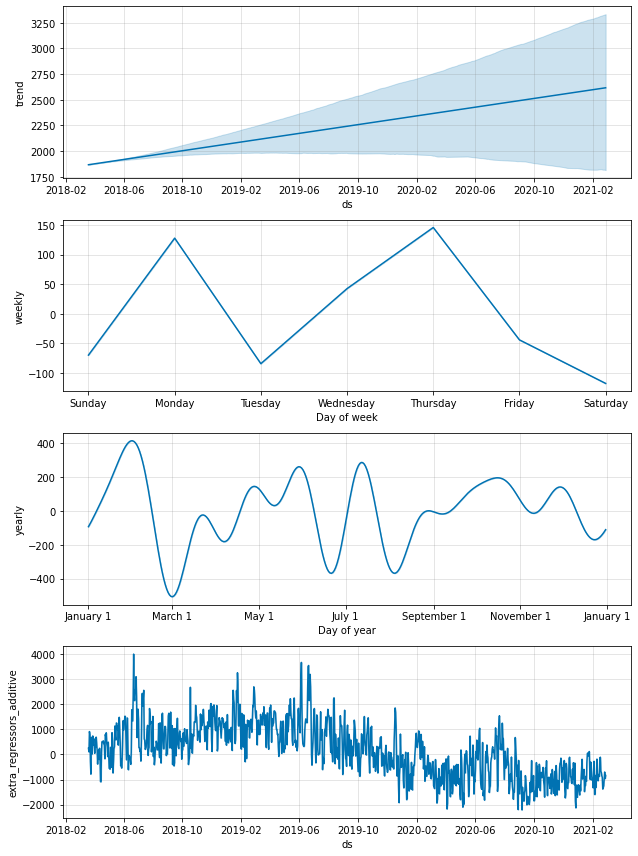

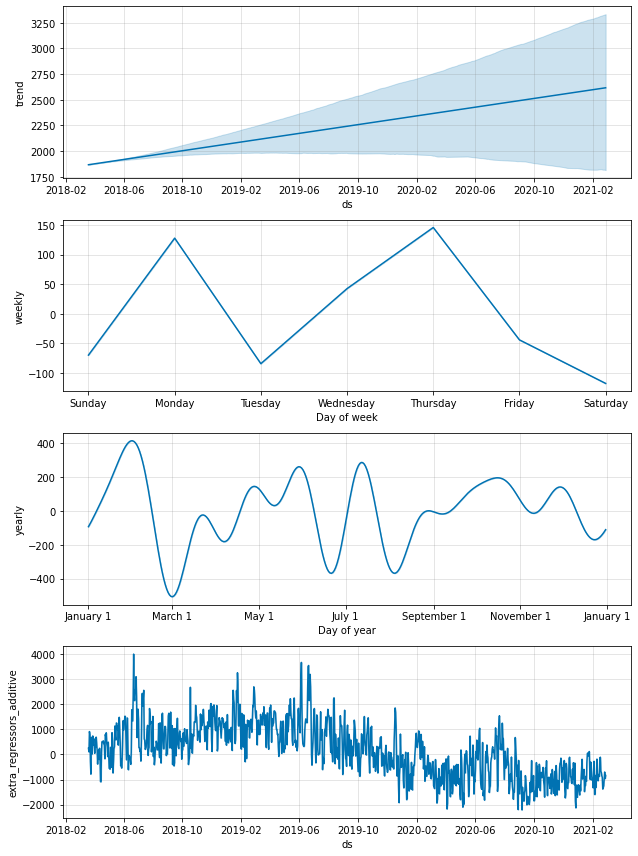

In [299]:
model.plot_components(new_forecast_values)

The day of the daily seasonality that has the highest value is Thursday.

Q20.

Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

## Answer

In [300]:
train_data_2 = df_daily.iloc[:2757,:]
test_data_2 = df_daily.iloc[2757:,:]

train_data_2.shape , test_data_2.shape

((2757, 5), (1077, 5))

In [301]:
train_2_df = train_data_2.iloc[:,[0,2,3,4]]
test_2_df = test_data_2.iloc[:,[0,2,3,4]]

In [302]:
# renaming the train_2 dataset
df_train_2 = train_2_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})

In [ ]:
# renaming the test_2 dataset
df_test_2 = test_2_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})

In [303]:
df_train_2.head(2)

,ds,add1,add2,y
0,2010-09-01,41565.38,88.56,2751.70
1,2010-09-02,38898.99,88.56,570.81


In [304]:
df_test_2.head(2)

,ds,add1,add2,y
2757,2018-03-20,7696.91130,201.588,1833.00
2758,2018-03-21,4658.05865,203.256,1730.49


In [305]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')

In [ ]:
model = model.fit(df_train_2)

In [307]:
new_forecast_values = model.predict(df_test_2)

In [308]:
MAPE = Metric(df_test_2['y'],new_forecast_values ['yhat'])
print(f'The Mean Average Percentage Error is:{round(MAPE,2)}')

The Mean Average Percentage Error is:236.66


## The Mean Average Percentage Error is: 236.66